# Assignment 3
## Mike Johnson
### December 4, 2024

****

#### Q1
Read in the city_sales20.xlsx Download city_sales20.xlsx data so that the data does note contain any additional text or notes, only the data on offices and sales.

In [1]:
# Import pandas
import pandas as pd

In [2]:
# Read Data
df = pd.read_excel('city_sales20.xlsx',
                   skiprows = 3,
                   skipfooter = 4)

In [3]:
# Verify the data was read correctly.
df

,office,2013,2014,2015,2016,2017,2018,2019,2020
0,NY,45,31,34,56,67,45,67,45
1,BOS,34,23,24,26,25,34,26,22
2,MIA,45,81,43,44,41,45,51,41
3,DC,12,13,15,11,11,18,19,20
4,SEA,52,48,47,41,41,42,44,42
5,PHI,43,39,38,38,33,35,41,40
6,CHI,36,35,36,39,38,33,29,27


****

#### Q2
Is the dataset in optimal form for analysis in which each column represents a variable/feature? Why or why not?

The dataset is not in an optimal form for analysis because the table is in a wide format with column for each year. This makes analysis difficult. <br>

Instead, each column should represent a single variable and each row should represent a single observation. To accomplish this, the year columns should be unpivoted.

****

#### Q3
Transform the dataframe so that it contains three columns--city, year, and sales--and save it as a new dataframe called d2.

In [4]:
# Transform df to unpivot year.
d2 = df.melt(id_vars = ['office'],
             var_name = 'year',
             value_name = 'sales')

In [5]:
# Verify the data was read correctly.
d2.head()

,office,year,sales
0,NY,2013,45
1,BOS,2013,34
2,MIA,2013,45
3,DC,2013,12
4,SEA,2013,52


****

#### Q4
Determine which office in the data had the highest mean sales between 2014 and 2020 (inclusive)

In [6]:
# Filter to 2014-2020
d2_q4 = d2[(d2['year'] >= 2014) & (d2['year'] <= 2020)]

# Summarize means sales by office
d2_q4 = d2_q4.groupby('office')['sales'].mean()

# Sort Values
d2_q4 = d2_q4.sort_values(ascending = False)

# Reset index
d2_q4 = d2_q4.reset_index()

d2_q4

,office,sales
0,MIA,49.428571
1,NY,49.285714
2,SEA,43.571429
3,PHI,37.714286
4,CHI,33.857143
5,BOS,25.714286
6,DC,15.285714


In [7]:
# Office with highest mean sales between 2014-2020
d2_q4.head(1)

,office,sales
0,MIA,49.428571


****

#### Q5
Calculate and plot mean sales by year across all offices.

In [8]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Summarize mean sales by year
d2_mean = d2.groupby('year')['sales'].mean().reset_index()
d2_mean

,year,sales
0,2013,38.142857
1,2014,38.571429
2,2015,33.857143
3,2016,36.428571
4,2017,36.571429
5,2018,36.000000
6,2019,39.571429
7,2020,33.857143


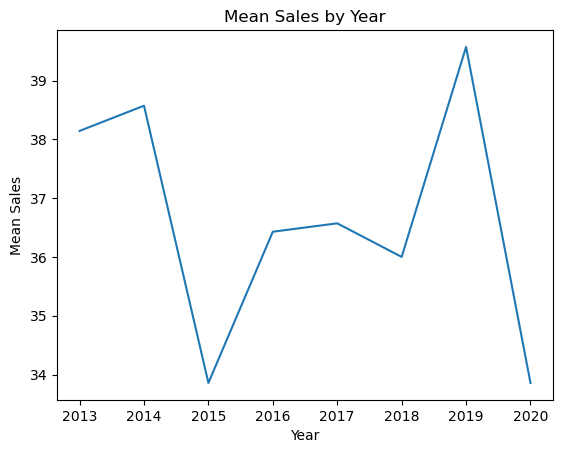

In [22]:
# Visualize 
sns.lineplot(data = d2_mean, 
             x = 'year', 
             y = 'sales')
plt.title('Mean Sales by Year')
plt.xlabel('Year')
plt.ylabel('Mean Sales')
plt.show()

****

#### Q6 
Plot (with altair or seaborn) the sales overtime in a line plot and color the lines by office.

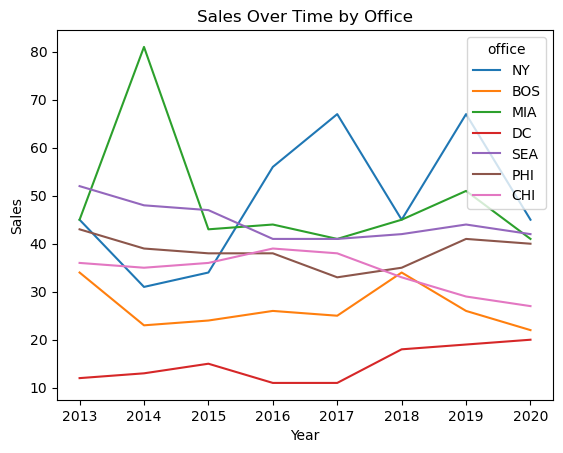

In [11]:
# Visualize
sns.lineplot(data = d2, 
             x = 'year', 
             y = 'sales',
             hue = 'office')
plt.title('Sales Over Time by Office')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

****

#### Q7
Every year, this dataset is updated with new data. Define a function called "clean_sales" that takes a file name, reads in the data so that there are no missing values and the result contains only the data on offices and sales and no additional text or notes, and then transforms the dataframe so that it contains three columns: city, year, and sales. The function should return the dataframe with three columns: city, year, sales.

In [12]:
# Define function called 'clean_sales
def clean_sales(file_name):
    # Read the file
    df = pd.read_excel(file_name,
                       skiprows = 3,
                       skipfooter = 4)
    
    # Remove any missing values
    df = df.dropna()
    
    # Unpivot Data Frame
    df = df.melt(id_vars = 'office',
                 var_name = 'year',
                 value_name = 'sales')

    # Rename office to city
    df = df.rename(columns = {'office': 'city'})
    
    # Return data frame
    return df

In [13]:
# Test function
d20 = clean_sales('city_sales20.xlsx')
d20.head()

,city,year,sales
0,NY,2013,45
1,BOS,2013,34
2,MIA,2013,45
3,DC,2013,12
4,SEA,2013,52


****

#### Q8
Apply the function to another dataset city_sales21.xlsx and create the a dataframe called d21 with the result. Return the last five rows of d21.

In [14]:
# Read city_sales21.xlsx
d21 = clean_sales('city_sales21.xlsx')

# Return last five rows of d21
d21.tail(5)

,city,year,sales
58,MIA,2021,74
59,DC,2021,20
60,SEA,2021,37
61,PHI,2021,32
62,CHI,2021,28


****

#### Q9
Use seaborn or altair to create a sorted (low to high) bar plot of the sales data by office from 2021. Which office has the highest sales?

In [15]:
# Summarize 2021 sales by office.
sales_2021 = d21[d21['year'] == 2021] # Filter to 2021
sales_2021 = sales_2021.groupby('city')['sales'].sum() # Group by office
sales_2021 = sales_2021.sort_values(ascending = False) # Sort Values
sales_2021 = sales_2021.reset_index() # Reset index
sales_2021

,city,sales
0,MIA,74
1,SEA,37
2,NY,35
3,PHI,32
4,CHI,28
5,BOS,20
6,DC,20


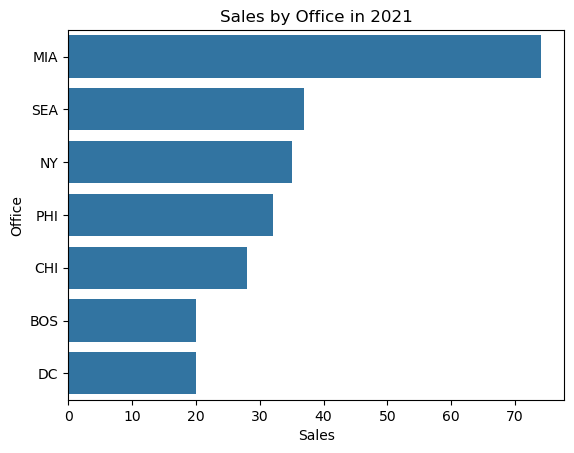

In [16]:
# Visualize with bar plot
sns.barplot(data = sales_2021,
            x = 'sales',
            y = 'city')
plt.title('Sales by Office in 2021')
plt.xlabel('Sales')
plt.ylabel('Office')
plt.show()

In [17]:
# Identify office with highest sales
sales_2021[sales_2021['sales'] == sales_2021['sales'].max()]

,city,sales
0,MIA,74


****

#### Q10
Using d21, what are the top five best performing year-city combinations.

In [18]:
# Top five best performing year-city combinations
top5 = d21.sort_values(by = 'sales', ascending = False) # Sort by values
top5 = top5.head(5) # Filter to top 5 rows
top5

,city,year,sales
9,MIA,2014,81
58,MIA,2021,74
42,NY,2019,67
28,NY,2017,67
21,NY,2016,56


****